In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./input/daejeon_vds16.csv')
df.head()
df.set_index('Date', inplace=True)

spd=df.reset_index()['Speed']
windows = 288


X, y = [], []
for i in range(len(spd)-windows-1):
    X.append(spd[i:(i+windows)])
    y.append(spd[(i+windows)])

X = np.array(X)
y = np.array(y)
X.shape
X[:3]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.20, shuffle=False)
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train_.shape, X_test_.shape) 

(6220, 288) (6220,)
(1555, 288) (1555,)
(6220, 288, 1) (1555, 288, 1)


In [5]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg_cnn():    
    model = Sequential()    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', 
                     input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))    
    model.add(Flatten())    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')    
    return model

model = reg_cnn()
model.fit(X_train_, y_train, epochs=60, validation_split=0.2)

Epoch 1/30
156/156 [==============================] - 3s 14ms/step - loss: 160.6371 - val_loss: 32.8892
Epoch 2/30
156/156 [==============================] - 2s 13ms/step - loss: 23.3572 - val_loss: 15.4571
Epoch 3/30
156/156 [==============================] - 2s 13ms/step - loss: 18.0795 - val_loss: 15.0066
Epoch 4/30
156/156 [==============================] - 2s 12ms/step - loss: 17.3969 - val_loss: 15.6501
Epoch 5/30
156/156 [==============================] - 2s 13ms/step - loss: 18.0738 - val_loss: 15.1696
Epoch 6/30
156/156 [==============================] - 2s 13ms/step - loss: 16.0337 - val_loss: 18.1050
Epoch 7/30
156/156 [==============================] - 2s 13ms/step - loss: 16.0180 - val_loss: 16.8992
Epoch 8/30
156/156 [==============================] - 2s 13ms/step - loss: 14.7898 - val_loss: 15.7675
Epoch 9/30
156/156 [==============================] - 2s 14ms/step - loss: 14.5635 - val_loss: 19.8232
Epoch 10/30
156/156 [==============================] - 2s 13ms/step - lo

49/49 [==============================] - 0s 5ms/step
Accuracy score of the predictions: 0.5109201774252519


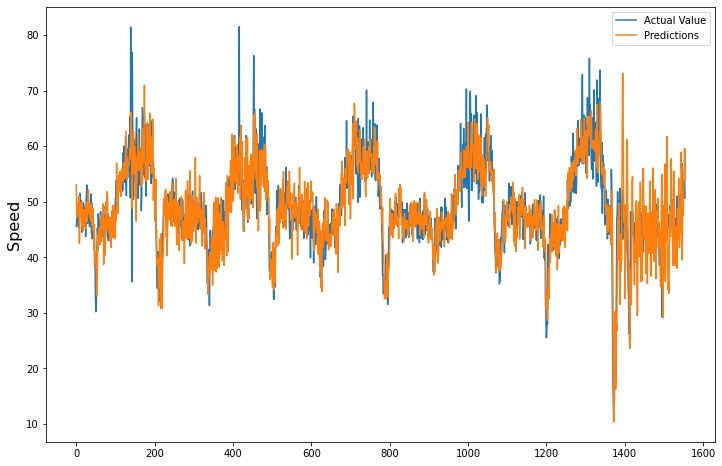

In [6]:
# Prediction
y_pred = model.predict(X_test_)
pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
pred_df.head()

# Measure the Accuracy Score
Acc=[]
from sklearn.metrics import r2_score
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))
Acc.append(r2_score(y_test, y_pred))

plt.figure(figsize=(12,8))
plt.ylabel('Speed', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()